<a href="https://colab.research.google.com/github/CRekkaran/Smart-Filter/blob/master/SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [ ]:
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
# !pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 764kB/s 
     |████████████████████████████████| 276kB 4.9MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200711-cp36-none-any.whl size=42285 sha256=5f8094c09e5901f07d92cac5439fa6459b2a4101549e8733009f7734fe2c3c63
  Stored in directory: /root/.cache/pip/wheels/be/e2/ff/183aa84c45c7f0a6f55d2a40bdbfc00e9d5c36b492065ec526
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=b134294d95dc97192bd32c39e55ac1a9f41883172b9bb5fb1bb8e99789935757
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built fvcore pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 276kB 2.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linu

In [ ]:
import torch, torchvision
import detectron2
# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

In [ ]:
from detectron2.modeling import build_model
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import  GenericMask
from detectron2.data import MetadataCatalog

In [ ]:
from detectron2.config import get_cfg
cfg = get_cfg()
model = build_model(cfg)

# Downloading Images and Pre-trained models

In [ ]:
!wget https://magazine.utoronto.ca/wp-content/uploads/2016/08/Selfie_480-1200x630-c-default.jpg
!wget https://static.toiimg.com/photo/71744566.cms
!wget https://i0.wp.com/cdn-prod.medicalnewstoday.com/content/images/articles/325/325984/person-taking-a-selfie.jpg?w=1155&h=1734

# !wget https://images.unsplash.com/photo-1574880880637-77f318efa2f4?crop=entropy&cs=tinysrgb&fit=crop&fm=jpg&h=900&ixid=eyJhcHBfaWQiOjF9&ixlib=rb-1.2.1&q=80&w=1600
!wget https://images.unsplash.com/photo-1590364319579-93c4f03b9ca6?crop=entropy&cs=tinysrgb&fit=crop&fm=jpg&h=1000&ixid=eyJhcHBfaWQiOjF9&ixlib=rb-1.2.1&q=80&w=1000
!wget https://images.unsplash.com/photo-1541692033570-5b2e9c4e2aa9?ixlib=rb-1.2.1&auto=format&fit=crop&w=334&q=80

--2020-07-10 11:49:19--  https://magazine.utoronto.ca/wp-content/uploads/2016/08/Selfie_480-1200x630-c-default.jpg
Resolving magazine.utoronto.ca (magazine.utoronto.ca)... 142.1.176.100
Connecting to magazine.utoronto.ca (magazine.utoronto.ca)|142.1.176.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118563 (116K) [image/jpeg]
Saving to: ‘Selfie_480-1200x630-c-default.jpg’

Selfie_480-1200x630 100%[===================>] 115.78K   633KB/s    in 0.2s    

2020-07-10 11:49:20 (633 KB/s) - ‘Selfie_480-1200x630-c-default.jpg’ saved [118563/118563]

--2020-07-10 11:49:22--  https://static.toiimg.com/photo/71744566.cms
Resolving static.toiimg.com (static.toiimg.com)... 23.6.108.124, 2600:1409:a:78e::216f, 2600:1409:a:791::216f
Connecting to static.toiimg.com (static.toiimg.com)|23.6.108.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189927 (185K) [image/jpeg]
Saving to: ‘71744566.cms’

71744566.cms        100%[===================>] 

In [ ]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

predictor = DefaultPredictor(cfg)

model_final_f10217.pkl: 178MB [00:16, 10.8MB/s]                           


In [ ]:
print(cfg.DATASETS.TRAIN[0])

coco_2017_train


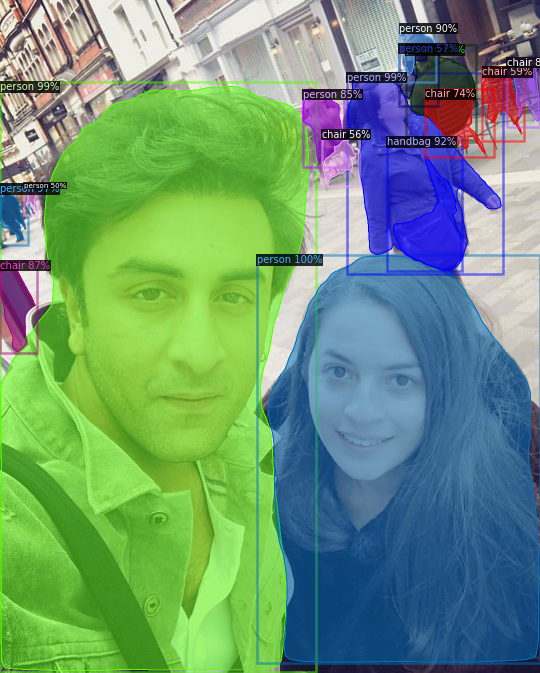

In [ ]:
path = '/content/'
im = cv2.imread(path + '2.jpg')
output = predictor(im)

# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
v = v.draw_instance_predictions(output["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

<h2>Semantic segmentation of humans only</h2>

**def union_masks(Visualizers.GenericMask.mask1, Visualizers.GenericMask.mask2) => Taking union of human masks**

In [ ]:
def union_masks(im1, im2):
  assert(im1.shape == im2.shape)
  return im1 | im2

In [ ]:
def return_attributes(path):
  im = cv2.imread(path)
  output = predictor(im)

  SCORE_THRESHOLD = 0.7
  AREA_FRACTION_THRESHOLD = 0.1

  instances = output['instances']

  # storing attributes
  predictions = output["instances"].to("cpu")
  boxes = predictions.pred_boxes if predictions.has("pred_boxes") else None
  scores = predictions.scores if predictions.has("scores") else None
  classes = predictions.pred_classes if predictions.has("pred_classes") else None
  # labels = du._create_text_labels(classes, scores, v.metadata.get("thing_classes", None))
  keypoints = predictions.pred_keypoints if predictions.has("pred_keypoints") else None

  v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.3)
  if predictions.has("pred_masks"):
      masks = np.asarray(predictions.pred_masks)
      masks = [GenericMask(x, v.output.height, v.output.width) for x in masks]
  else:
    masks = None

  humans = (classes==0).nonzero().reshape(-1).numpy()
  temp = []
  for i in range(len(humans)):
    if(scores[humans[i]]>SCORE_THRESHOLD and masks[i].area()/(im.shape[0] * im.shape[1])>AREA_FRACTION_THRESHOLD):
      temp.append(humans[i])

  humans = temp

  human_masks = []

  for i in range(len(masks)):
    # if(i in humans):
    if(i in humans):
      human_masks.append(masks[i])

  # changing all boxes -> human boxes
  a = boxes.tensor.numpy()
  aa = np.array([])
  for i in humans:
    aa = np.append(aa, a[i])
  r, c = len(humans), (aa.shape[0]//len(humans))
  boxes.tensor = torch.from_numpy(aa.reshape(r, c))

  return im, human_masks, boxes

**This cell crops out the human box**

In [ ]:
# boxes_array => a tuple containing x0, y0, x1, y1 coordinates, where x0 and y0 are the coordinates of the image's top left corner. x1 and y1 are the coordinates of the image's bottom right corner.
def bound_human_boxes(boxes):
  boxes_array = boxes.tensor.numpy()
  human_crop_images = []
  for i in boxes_array:
    x0, y0, x1, y1 = [int(x) for x in i]
    width = x1 - x0
    height = y1 - y0
    human_crop_images.append(im[y0:y1, x0:x1, :])

  return human_crop_images

**def remove_bg(image, human_masks) => removes backgroung excepts all humans**

In [ ]:
def return_union_mask(im, human_masks):
  union_mask = human_masks[0].mask
  if len(human_masks)>1:
    for i in range(1, len(human_masks)):
      union_mask = union_masks(union_mask, human_masks[i].mask)
  return union_mask

def remove_bg(im, union_mask):
  temp = im
  h1_mask = union_mask
  for i in range(h1_mask.shape[0]):
    for j in range(h1_mask.shape[1]):
      if(h1_mask[i][j]==0):
        temp[i][j][:] = 255
  return temp

# Functions | Adding Filters

In [ ]:
def addFilterRandom(im, union_mask):
  # Add color pattern
  temp = im
  h1_mask = union_mask
  
  for i in range(h1_mask.shape[0]):
    for j in range(h1_mask.shape[1]):
      
      if(h1_mask[i][j]==0):
        temp[i][j][0] = int(i*j/255)
        temp[i][j][1] = int((h1_mask.shape[0]-i)*(h1_mask.shape[1]-j)/255 - int(random.random())*50)
        temp[i][j][2] = int(min(i+int(random.random())*140, j)/255)
  
  return temp

def addPreset(im, union_mask):
  # Add aesthetically pleasing color gradients [Till now, able to do for single color. horizontal direction only]
  # Try to add 2 colors, horizontally and vertically in a gradient fashion.
  temp = im
  h1_mask = union_mask
  
  for i in range(h1_mask.shape[0]):
    for j in range(h1_mask.shape[1]):
      
      if(h1_mask[i][j]==0):
        red = 255*(1-(j/h1_mask.shape[1]))
        temp[i][j] = [red, 255, 255]
  return temp  

In [ ]:
import random
def wrangleArray(p):
  max_p = max(p)
  min_p = min(p)
  for i in range(len(p)):
    if(random.random()>0.5):
      p[i] -= max(min_p,int(random.random()*30))
    else:
      p[i] += min(max_p,int(random.random()*30))

  return p

def addSticker(im, union_mask, emoji):
  # put a desired sticker onto the final segmented out selfie
  temp = im
  h1_mask = union_mask
  emoji = cv2.resize(emoji, (30, 30))
  
  width = h1_mask.shape[0]
  length = h1_mask.shape[1]

  for i in range(width):
    for j in range(length):    
      if(h1_mask[i][j]==0):
        red = 255*(1-(j/length))
        blue = 255*(1-(i/width))
        temp[i][j] = [red, 255, blue]

  return temp

# Unsplash

In [ ]:
from io import BytesIO
import urllib
import tensorflow as tf

from PIL import Image
import requests
from io import BytesIO

def createThumbnail(filename):
  '''
    createThumbnail('me.jpg')
    creates lower resolution png format image
  '''
  from PIL import Image
  path = './'
  size = 1080, 1296
  im = Image.open(path+filename)
  im.thumbnail(size, Image.ANTIALIAS)
  im.save(path+filename.split('.')[0]+'.png', "PNG")

def loadImage(URL):
    # with urllib.request.urlopen(URL) as url:
    #     img = tf.keras.preprocessing.image.load_img(BytesIO(url.read()), target_size=(w, h))
    response = requests.get(URL)
    img = Image.open(BytesIO(response.content))
    return np.array(img)

def addUnsplash(filename, catagory):
  # TODO: Either match the dimensions of bg with im or find a way to add white margins

  im, human_masks, boxes = return_attributes(path+filename)
  final_mask = return_union_mask(im, human_masks)
  
  bg = loadImage('https://source.unsplash.com/1080x1296/?'+catagory)

  for i in range(final_mask.shape[0]):
    for j in range(final_mask.shape[1]):  
      if(final_mask[i][j]==0):
        temp[i,j,:] = bg[i,j,:]
  
  return temp

def addCustomBackground(filename, background):
  # Assumed background is of same aspect ratio

  im, human_masks, boxes = return_attributes(path+filename)
  final_mask = return_union_mask(im, human_masks)
  bg = cv2.imread(path+background)
  
  temp = im

  jrange = (final_mask.shape[1]//2-bg.shape[1]//2, final_mask.shape[1]//2+bg.shape[1]//2)
  for i in range(final_mask.shape[0]):
      for j in range(jrange[0], jrange[1]):  
        if(final_mask[i][j]==0):
          temp[i,j,:] = bg[i,j-jrange[0],:]
  return temp

In [ ]:
def addBackgroundImage(filename, catagory):
  im = cv2.imread('./'+filename)
  if(im.shape[0]!=1296 or im.shape[1]!=1080):
    createThumbnail(filename)
    cv2_imshow(addUnsplash('./'+filename.split('.')[0]+'.png', catagory))
  else:
    cv2_imshow(addUnsplash(filename, catagory))

In [ ]:
# SUPPORT GAY PRIDE
im = (addCustomBackground('me2.png', 'pride2.jpg'))
caption = cv2.imread('./gaypride.png')
# cv2_imshow(caption)
jrange = (im.shape[1]//2-caption.shape[1]//2, im.shape[1]//2+caption.shape[1]//2)
for i in range(im.shape[0]-110, im.shape[0]):
  for j in range(jrange[0], jrange[0]+1080):
    im[i,j,:] = caption[i-im.shape[0]+110, j-jrange[0], :]
cv2_imshow(im)

# Add strip background

In [ ]:
createThumbnail('3.jpg')

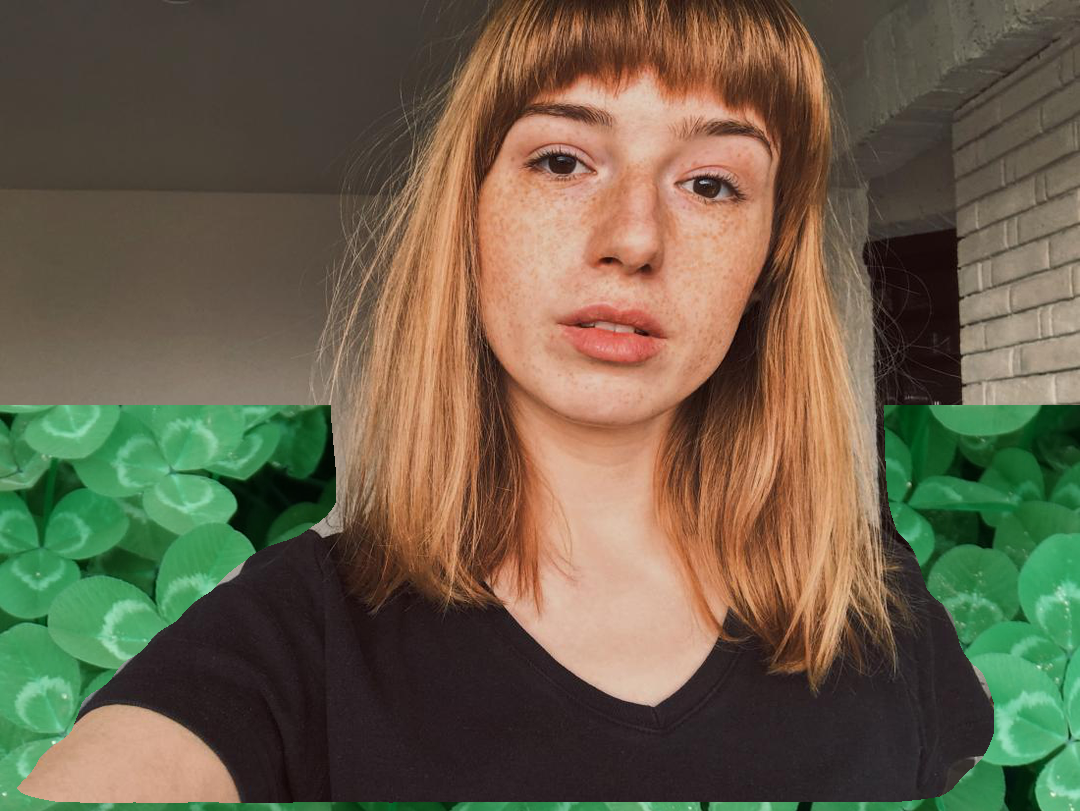

In [ ]:
path = './'
filename='3.png'
catagory = 'leaves,green'

im, human_masks, boxes = return_attributes(path+filename)
final_mask = return_union_mask(im, human_masks)

bg = loadImage('https://source.unsplash.com/1080x1920/?'+catagory)
# bg = cv2.imread('./4.jpg')
# cv2_imshow(bg)
# bg = bg[:100,:,:]

temp = im
jrange = (final_mask.shape[1]//2-bg.shape[1]//2, final_mask.shape[1]//2+bg.shape[1]//2)
for i in range(final_mask.shape[0]//2, final_mask.shape[0]):
    for j in range(jrange[0], jrange[1]):  
      if(final_mask[i][j]==0):
        temp[i,j,:] = bg[i-final_mask.shape[0]//2,j-jrange[0],:]
cv2_imshow(temp)

# Face Detect

In [ ]:
import pandas as pd
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
import json
import codecs
import requests
import urllib
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
from io import BytesIO
import itertools
import random
import os

In [ ]:
MODEL_PATH = 'COCO-Detection/retinanet_R_101_FPN_3x.yaml'
def cfg_test():
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(MODEL_PATH))
    cfg.MODEL.WEIGHTS = '/content/drive/My Drive/Colab Notebooks/checkpoint_face.pth'
    cfg.MODEL.RETINANET.NUM_CLASSES = 1
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.50
    
    return cfg

cfg_face = cfg_test()
predict = DefaultPredictor(cfg_face)

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread('./2.jpg', cv2.IMREAD_COLOR)
output = predict(img)
pred_boxes = np.array(output['instances']._fields['pred_boxes'].tensor.cpu(), dtype='int32')
pred_boxes
for i in pred_boxes:
  cv2_imshow(img[i[1]:i[3],i[0]:i[2],:])

# SMILE Detection

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [ ]:
def SmileModel():
    INPUT_SHAPE = (64, 64, 3)
    num_classes = 2
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=INPUT_SHAPE))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

#     opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
#     # Let's train the model using RMSprop
#     model.compile(loss='binary_crossentropy',
#                   optimizer=opt,
#                   metrics=['accuracy'])
    return model

model = SmileModel()
model.load_weights('./smiledetection.h5')

In [ ]:
temp = img[i[1]:i[3],i[0]:i[2],:]
temp = cv2.resize(temp, dsize=(64, 64))
temp = temp.reshape(1, 64, 64, 3)
proba = model.predict(temp)
proba

array([[1., 0.]], dtype=float32)

In [ ]:
isSmiling = proba[0][0]>proba[0][1]
if isSmiling:
  textOnImage = 'Smiling: ' + str('%.2f' % proba[0][0])
else:
  textOnImage = 'Not Smiling: ' + str('%.2f' % proba[0][1])
textOnImage

'Smiling: 1.00'

# End-to-End Pipeline

In [ ]:
cv2.imread('./selfie.png')

In [ ]:
!wget https://images.samsung.com/is/image/samsung/p5/global/mkt/explore/photography/still-photos/the-science-of-a-selfie/ARTICLE_HERO.png?$ORIGIN_PNG$

--2020-07-10 13:00:46--  https://images.samsung.com/is/image/samsung/p5/global/mkt/explore/photography/still-photos/the-science-of-a-selfie/ARTICLE_HERO.png?$
Resolving images.samsung.com (images.samsung.com)... 23.44.160.118
Connecting to images.samsung.com (images.samsung.com)|23.44.160.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 827609 (808K) [image/jpeg]
Saving to: ‘ARTICLE_HERO.png?$’

ARTICLE_HERO.png?$  100%[===================>] 808.21K  1.09MB/s    in 0.7s    

2020-07-10 13:00:49 (1.09 MB/s) - ‘ARTICLE_HERO.png?$’ saved [827609/827609]



In [ ]:
im, human_masks, boxes = return_attributes('./selfie.png')
final_mask = return_union_mask(im, human_masks)

face_detection_output = predict(im)
face_detection_output

{'instances': Instances(num_instances=1, image_height=787, image_width=1440, fields=[pred_boxes: Boxes(tensor([[662.7498, 249.6650, 827.1395, 430.3689]], device='cuda:0')), scores: tensor([0.5152], device='cuda:0'), pred_classes: tensor([0], device='cuda:0')])}

In [ ]:
pred_boxes = np.array(face_detection_output['instances']._fields['pred_boxes'].tensor.cpu(), dtype='int32')
pred_boxes

array([[662, 249, 827, 430]], dtype=int32)

In [ ]:
num_faces = pred_boxes.shape[0]
prob_smiling_faces = []
for i in pred_boxes:
  temp = im[i[1]:i[3],i[0]:i[2],:]
  temp = cv2.resize(temp, dsize=(64, 64))
  temp = temp.reshape(1, 64, 64, 3)
  proba = model.predict(temp)
  prob_smiling_faces.append(proba[0][0]) # Smiling probability of each person
prob_smiling_faces

[0.0]

In [ ]:
# TEXT SPECIFICATIONs
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (50,50)
fontScale              = 1
fontColor              = (0,0,255)
lineType               = 2

He/She is not smiling.


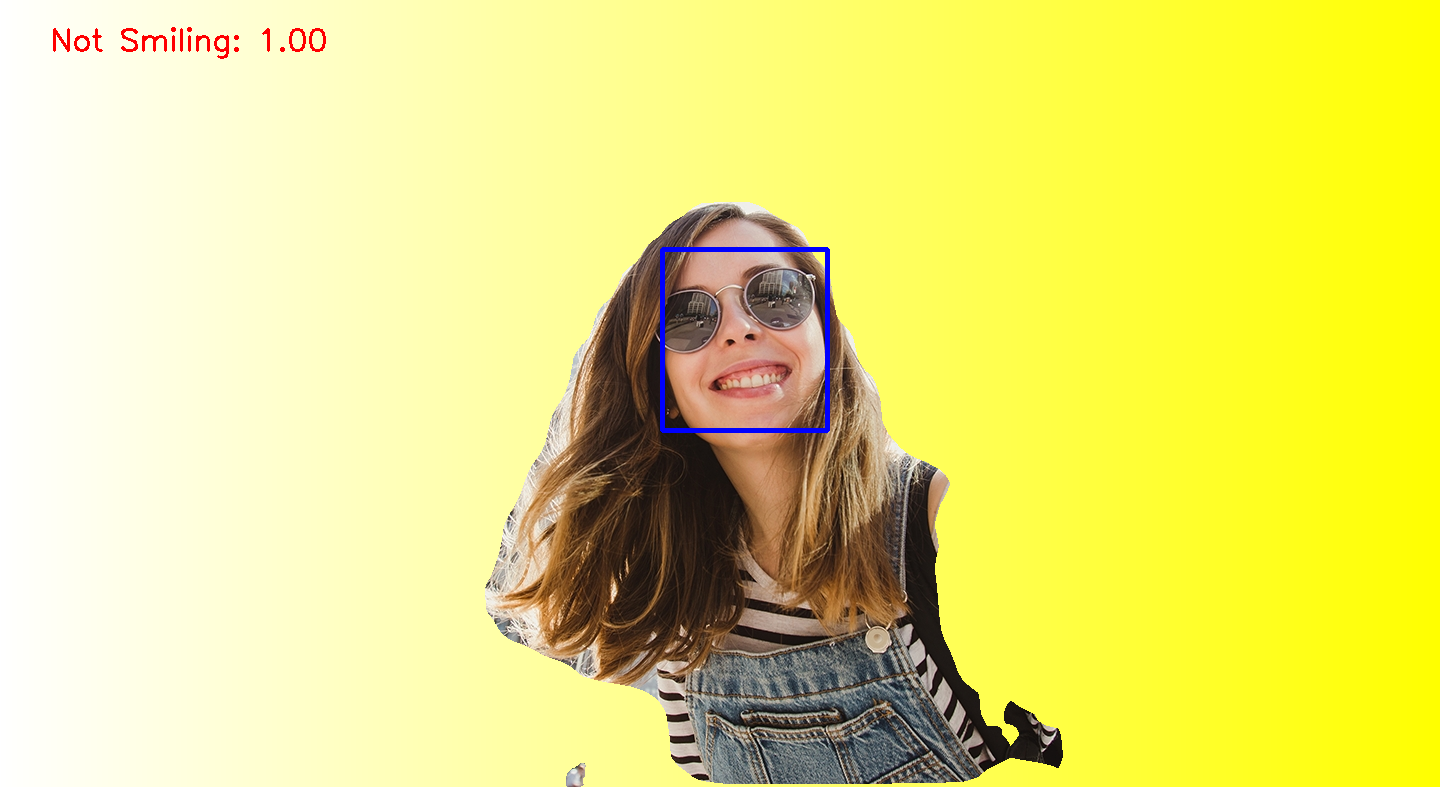

In [ ]:
prob_smiling_faces = np.array(prob_smiling_faces)
index_smile_most = np.argmax(prob_smiling_faces) # Person smiling most
smiling_prob_final = prob_smiling_faces[index_smile_most] # Smiling probability of person smiling most

face_final = pred_boxes[index_smile_most]

isSmiling = smiling_prob_final > 0.5
if isSmiling:
  textOnImage = 'Smiling: ' + str('%.2f' % proba[0][0])
else:
  textOnImage = 'Not Smiling: ' + str('%.2f' % proba[0][1])

segmented_image = addPreset(im, final_mask)

cv2.putText(segmented_image,textOnImage, 
  bottomLeftCornerOfText, 
  font, 
  fontScale,
  fontColor,
  lineType)
padding_w = 10
padding_h = 10

x, y, w, h = face_final

# PUTTING BOUNDING BOX ON IMAGE: BOX PREVIOUSLY CALCULATED USING CASCADE
cv2.rectangle(im,(x,y),(w,h),(255,0,0),3)

if((num_faces)>1):
  t1 ='They are '
else:
  t1 = 'He/She is '
if(isSmiling):
  t2 = 'smiling.'
else:
  t2 = 'not smiling.'
print(t1+t2)

# IMSHOW FINAL IMAGE WITH FACE AND SMILE DETECTION
cv2_imshow(im)

# How-to call above functions:

In [ ]:

path = '/content/'
#returns necessary attrbutes and results from model output
im, human_masks, boxes = return_attributes(path+'me.jpg')
print('Masks calculated')

# list of singular human images
final_images = bound_human_boxes(boxes)

# final mask => NxM bool matrix : value is 1 if human is present on the pixel
final_mask = return_union_mask(im, human_masks)
print('Final Mask created')

# Remove background and show the resultant image 
cv2_imshow(remove_bg(im, final_mask))

# Add color gradient backgrounds created in function
cv2_imshow(addFilterRandom(im, final_mask))
cv2_imshow(addPreset(im, final_mask))

# emoji_1 = cv2.imread('./emoji_1.png')

# add patters background generated in function
output = addFilterRandom(im, final_mask)
cv2_imshow(cv2.resize(output, (output.shape[1]//2, output.shape[0]//2)))

# Add Background image from unsplash, given the catagory
addBackgroundImage('me2.jpg', 'texture')